In [1]:
#imports

import numpy as np
import pandas as pd
import os
import glob
import cv2
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import np_utils
from PIL import ImageFile 
import matplotlib.pyplot as plt
from keras.preprocessing import image                  
from tqdm import tqdm
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

# **Importing data**

In [14]:
data_dir = "../input/state-farm-distracted-driver-detection/imgs"
test_data_dir = os.path.join(data_dir,"test")
train_data_dir = os.path.join(data_dir,"train")

# **Resising the image**

In [15]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))
    return resized

# Making training data

In [4]:
def get_train_data():
    X_train = []
    y_train = []
    
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join(train_data_dir, 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            flbase = os.path.basename(fl)
            img = resize(fl, 64, 64)
            #img = np.expand_dims(img, axis=0)
            X_train.append(img)
            y_train.append(j)
    return X_train, y_train

In [5]:
X, y = get_train_data()

Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9


In [6]:
print('Shape of X is',len(X))
print('Shape of Y is',len(y))

Shape of X is 22424
Shape of Y is 22424


In [45]:
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

# explanation for each of the classes
class_dict = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

Text(0.5, 1.0, 'Talking to passenger')

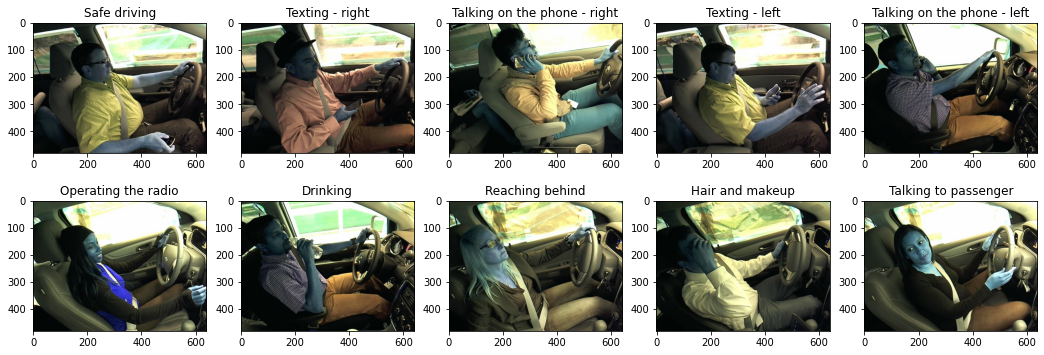

In [48]:
# Sample Image for each class
img_array=[]
for i in classes:
    path = os.path.join(train_data_dir, i)
    
    for img in os.listdir(path):
        imgs = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        img_array.append(imgs)
        break

f, axarr = plt.subplots(2,5,figsize=(18,6))  

axarr[0,0].imshow(img_array[0])
axarr[0,0].set_title(class_dict.get('c0')) 

axarr[0,1].imshow(img_array[1])
axarr[0,1].set_title(class_dict.get('c1')) 

axarr[0,2].imshow(img_array[2])
axarr[0,2].set_title(class_dict.get('c2')) 

axarr[0,3].imshow(img_array[3])
axarr[0,3].set_title(class_dict.get('c3')) 

axarr[0,4].imshow(img_array[4])
axarr[0,4].set_title(class_dict.get('c4')) 

axarr[1,0].imshow(img_array[5])
axarr[1,0].set_title(class_dict.get('c5')) 

axarr[1,1].imshow(img_array[6])
axarr[1,1].set_title(class_dict.get('c6')) 

axarr[1,2].imshow(img_array[7])
axarr[1,2].set_title(class_dict.get('c7')) 

axarr[1,3].imshow(img_array[8])
axarr[1,3].set_title(class_dict.get('c8')) 

axarr[1,4].imshow(img_array[9])
axarr[1,4].set_title(class_dict.get('c9'))